<a href="https://colab.research.google.com/github/PitonWuk/WAG/blob/main/module2/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D0%B0%D0%BD%D0%B0%D0%BB%D1%96%D0%B7_%D0%B4%D0%B0%D0%BD%D0%B8%D1%852.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module2/data/weatherHistory.csv")

In [4]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Завдання 1
Виведіть основні числові характеристики для числових ознак. Що потрібно зробити з стовпчиком `Loud Cover`?

In [5]:
df["Loud Cover"] = df["Loud Cover"].astype("category")

numeric_features = df.select_dtypes(include=['float64', 'int64'])
print(numeric_features.describe())
print()
print(df["Loud Cover"].value_counts())


       Temperature (C)  Apparent Temperature (C)      Humidity  \
count     96453.000000              96453.000000  96453.000000   
mean         11.932678                 10.855029      0.734899   
std           9.551546                 10.696847      0.195473   
min         -21.822222                -27.716667      0.000000   
25%           4.688889                  2.311111      0.600000   
50%          12.000000                 12.000000      0.780000   
75%          18.838889                 18.838889      0.890000   
max          39.905556                 39.344444      1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  \
count       96453.000000            96453.000000     96453.000000   
mean           10.810640              187.509232        10.347325   
std             6.913571              107.383428         4.192123   
min             0.000000                0.000000         0.000000   
25%             5.828200              116.000000         8.3

# Завдання 2
Подивіться на отриману таблицю, особливо на характеристики `min` та `max`, для яких ознак потрібно побудувати ящики з вусами в першу чергу? Для решти намалюйте гістограми.


- не розумію що тут невірно зроблено...чому видає помилку


ValueError: num must be an integer with 1 <= num <= 6, not 7

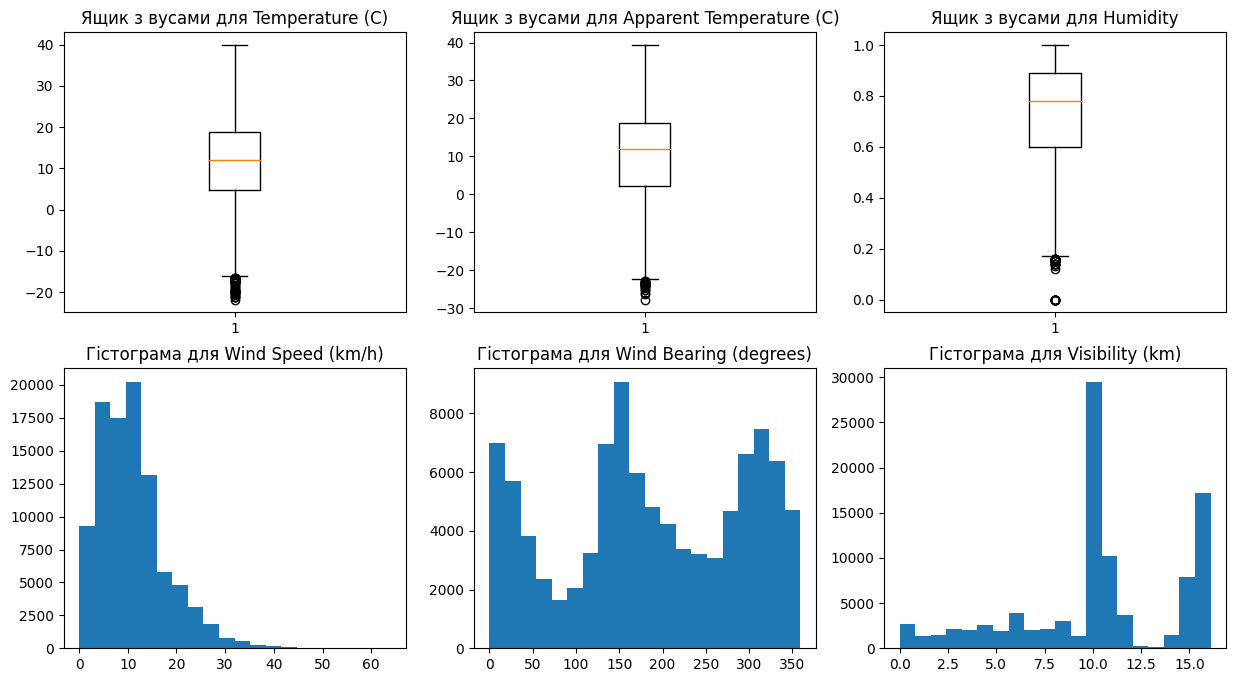

In [12]:


numeric_features = df.select_dtypes(include=['float64', 'int64']).columns

features_to_boxplot = ["Temperature (C)", "Apparent Temperature (C)", "Humidity"]


features_to_hist = [feature for feature in numeric_features if feature not in features_to_boxplot]

plt.figure(figsize=(15, 8))
for i, feature in enumerate(features_to_boxplot, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[feature])
    plt.title(f'Ящик з вусами для {feature}')

for i, feature in enumerate(features_to_hist, 1):
    plt.subplot(2, 3, i + len(features_to_boxplot))  # Виправлення індексу
    plt.hist(df[feature], bins=20)
    plt.title(f'Гістограма для {feature}')

plt.tight_layout()
plt.show()

# Завдання 3
Чи потрібно застосувати квантильний алгоритм для видалення викидів? Якщо так то застосуйте, інакше, що на вашу думку потрібно зробити?

In [16]:
numeric_features = df.select_dtypes(include=[np.number])

q_low = numeric_features.quantile(0.05)
q_high = numeric_features.quantile(0.95)

df_filtered = df[(numeric_features >= q_low) & (numeric_features <= q_high)].dropna()

print("Розмір початкового датафрейму:", df.shape)
print("Розмір датафрейму після видалення викидів за допомогою квантильного алгоритму:", df_filtered.shape)

Розмір початкового датафрейму: (96453, 12)
Розмір датафрейму після видалення викидів за допомогою квантильного алгоритму: (0, 12)


# Завдання 4
Намалюйте матрицю кореляцій. Для найбільш корельованих ознак намалюйте точкову діаграму

<ipython-input-19-71f0d9a0627f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


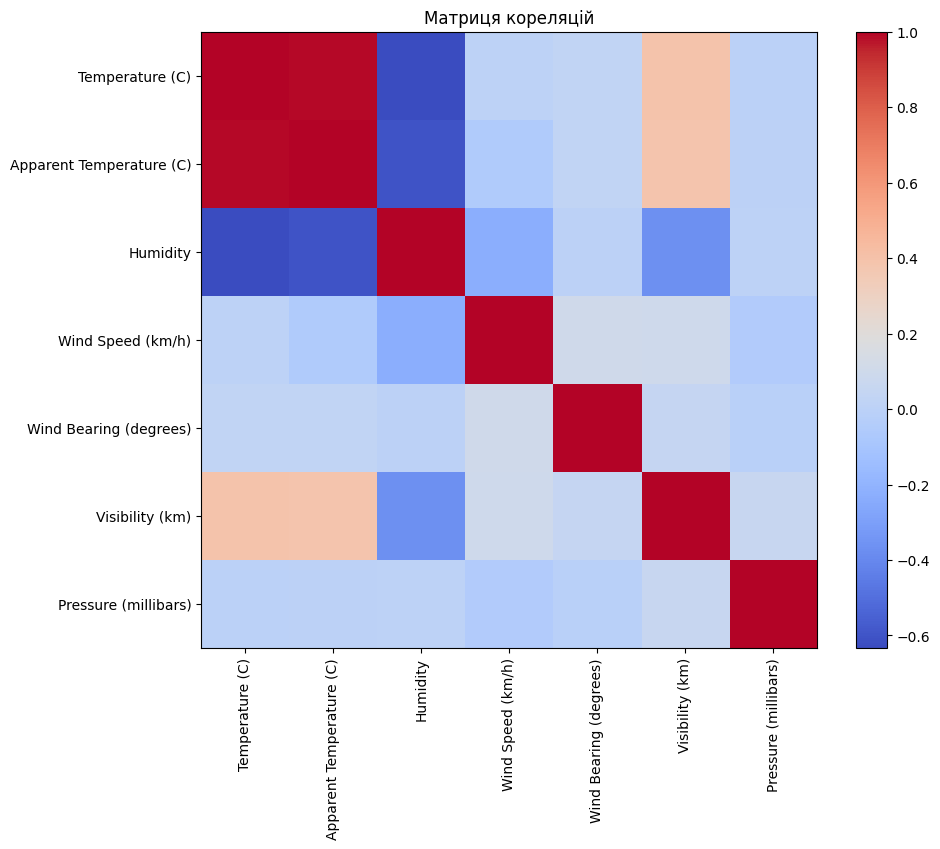

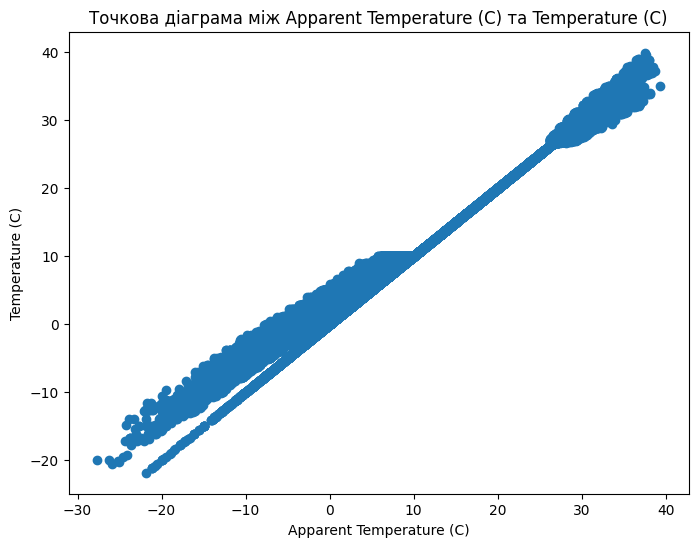

In [19]:
correlation_matrix = df.corr()


plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title('Матриця кореляцій')
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90)
plt.yticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns)
plt.show()

max_corr = correlation_matrix.abs().unstack().sort_values(ascending=False)
max_corr = max_corr[max_corr != 1]  # Видаляємо кореляцію з самим собою
max_corr = max_corr.reset_index()
max_corr.columns = ['Feature 1', 'Feature 2', 'Correlation']

most_correlated = max_corr.iloc[0]
feature1 = most_correlated['Feature 1']
feature2 = most_correlated['Feature 2']

plt.figure(figsize=(8, 6))
plt.scatter(df[feature1], df[feature2])
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title(f'Точкова діаграма між {feature1} та {feature2}')
plt.show()

# Завдання 5
Виведіть характеристики для категоріальних ознак

In [20]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.describe()

,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


# Завдання 6
Виведіть групові ящики з вусами по одній(або декількох) категоріальних ознак. Що по них можна сказати?

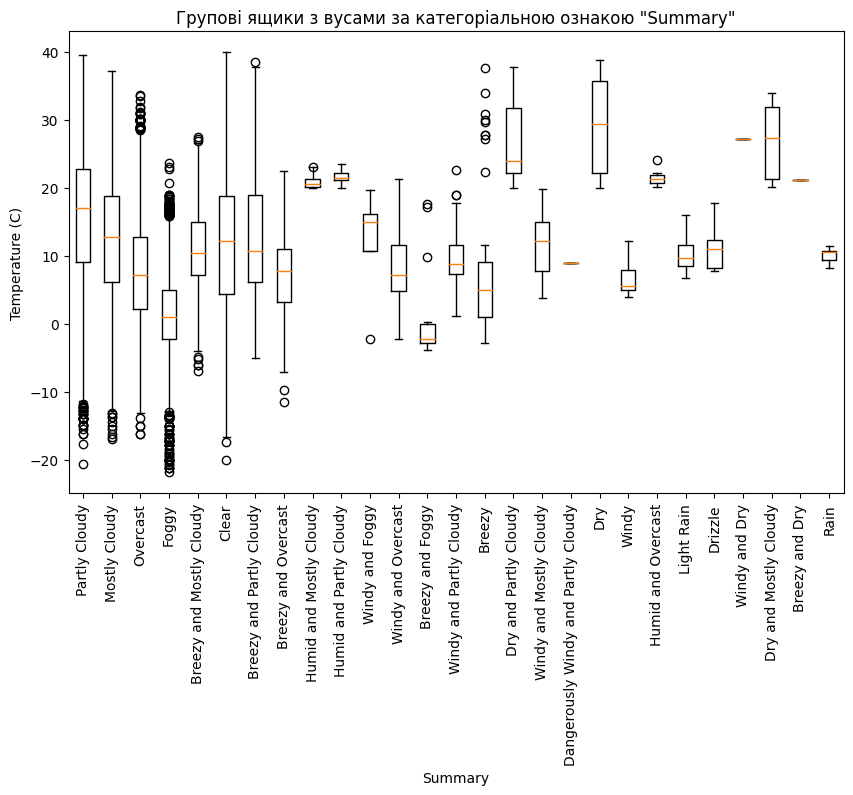

In [22]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['Summary'] == summary]['Temperature (C)'] for summary in df['Summary'].unique()],
            labels=df['Summary'].unique())
plt.xlabel('Summary')
plt.ylabel('Temperature (C)')
plt.title('Групові ящики з вусами за категоріальною ознакою "Summary"')
plt.xticks(rotation=90)
plt.show()